In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Dell\Downloads\Zomato data .csv")
df


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.shape

(148, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


**Data Cleaning**

**Convert the data type of column-rate**

In [7]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0];
    return float(value)


df["rate"]=df["rate"].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [10]:
df.dtypes

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

In [11]:
df["online_order"].unique()
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df["online_order"] =df["online_order"].astype(str).str.strip().str.lower().map({"yes":1,"no":0})
df["book_table"] =df["book_table"].astype(str).str.strip().str.lower().map({"yes":1,"no":0})


In [13]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet
5,Timepass Dinner,1,0,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,800,Buffet
7,Onesta,1,1,4.6,2556,600,Cafes
8,Penthouse Cafe,1,0,4.0,324,700,other
9,Smacznego,1,0,4.2,504,550,Cafes


In [14]:
df["online_order"].value_counts(dropna=False)
df["book_table"].value_counts(dropna=False)


book_table
0    140
1      8
Name: count, dtype: int64

In [15]:
df["online_order"]=df["online_order"].replace({"yes":1,"no":0,"yes":1,"no":0})
df["book_table"]=df["book_table"].replace({"yes":1,"no":0,"yes":1,"no":0})

In [16]:
df[["online_order","book_table"]].head(10)

,online_order,book_table
0,1,1
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,0,0
7,1,1
8,1,0
9,1,0


In [17]:
df["approx_cost(for two people)"].unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100, 350, 250, 950])

In [18]:
df["approx_cost(for two people)"]=(df["approx_cost(for two people)"].astype(str).str.replace(",",   "").astype(int))

In [19]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet
5,Timepass Dinner,1,0,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,800,Buffet
7,Onesta,1,1,4.6,2556,600,Cafes
8,Penthouse Cafe,1,0,4.0,324,700,other
9,Smacznego,1,0,4.2,504,550,Cafes


In [20]:
df["rate"].describe()

count    148.000000
mean       3.633108
std        0.402271
min        2.600000
25%        3.300000
50%        3.700000
75%        3.900000
max        4.600000
Name: rate, dtype: float64

In [21]:
df.groupby("online_order")["rate"].mean()

online_order
0    3.487778
1    3.858621
Name: rate, dtype: float64

In [22]:
df.groupby("book_table")["rate"].mean()

book_table
0    3.601429
1    4.187500
Name: rate, dtype: float64

In [23]:
df[["rate","votes","approx_cost(for two people)"]].corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.489844,0.275216
votes,0.489844,1.000000,0.324372
approx_cost(for two people),0.275216,0.324372,1.000000


**Exploratory Data Analysis**

**Online Order Distribution**

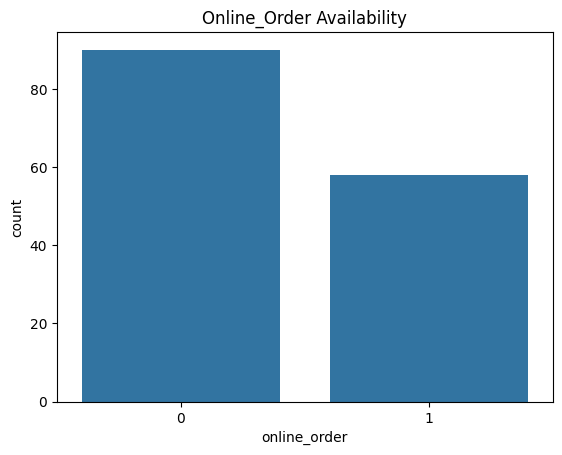

In [24]:
sns.countplot(x="online_order",data=df)
plt.title("Online_Order Availability")
plt.show()

**Raing vs Online Order**

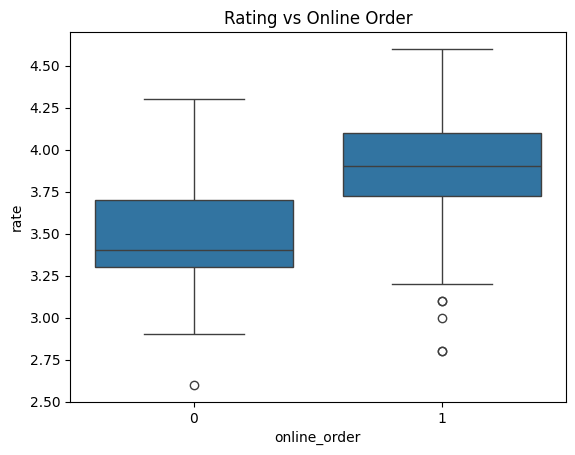

In [25]:
sns.boxplot(x="online_order",y="rate",data=df)
plt.title("Rating vs Online Order")
plt.show()

**Table Booking Analysis**

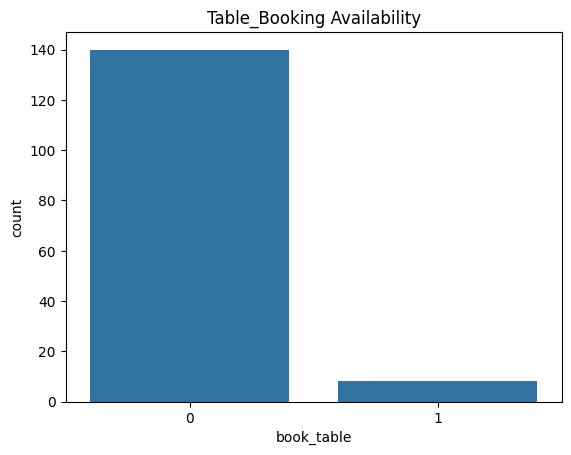

In [26]:
sns.countplot(x="book_table",data=df)
plt.title("Table_Booking Availability")
plt.show()

**Rating Distribution**

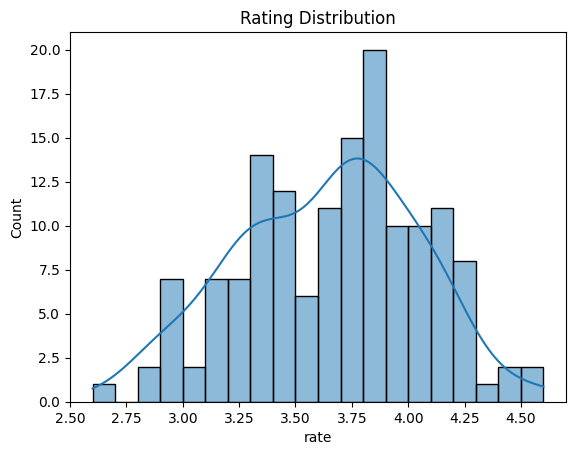

In [27]:
sns.histplot(df["rate"],bins=20,kde=True)
plt.title("Rating Distribution")
plt.show()

**Votes vs Rating**

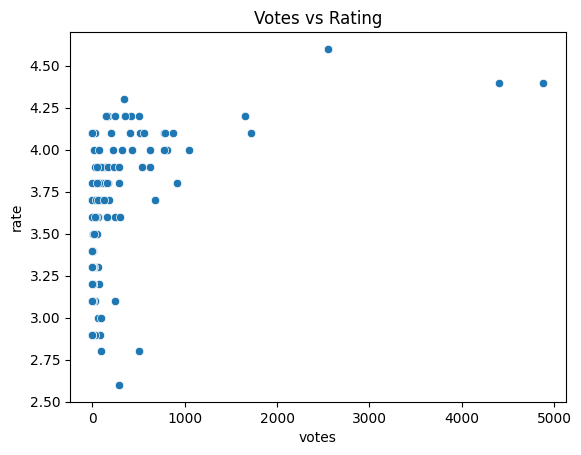

In [28]:
sns.scatterplot(x="votes",y="rate",data=df)
plt.title("Votes vs Rating")
plt.show()

**Cost Distribution**

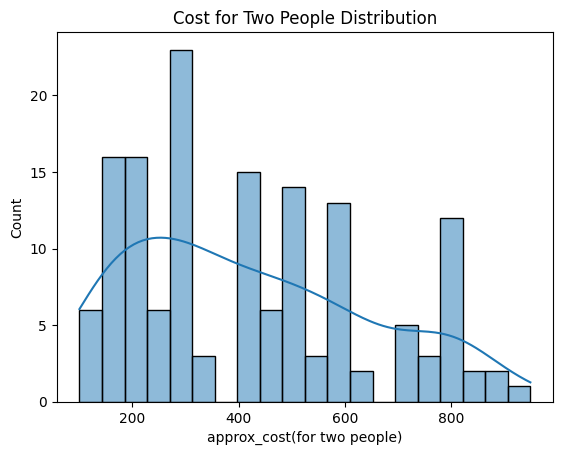

In [29]:
sns.histplot(df["approx_cost(for two people)"],bins=20,kde=True)
plt.title("Cost for Two People Distribution")
plt.show()

**Cost vs Rating**

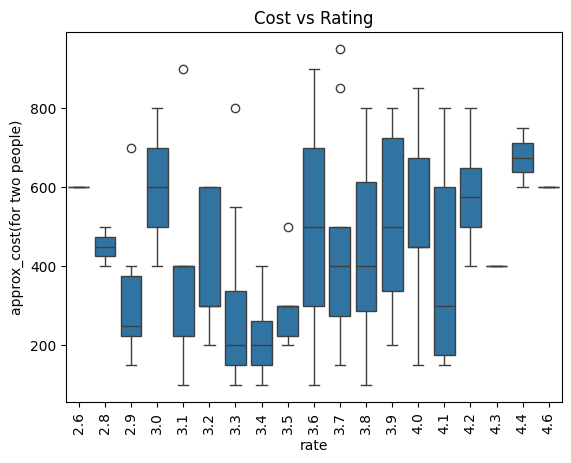

In [30]:
sns.boxplot(x="rate",y="approx_cost(for two people)",data=df)
plt.xticks(rotation=90)
plt.title("Cost vs Rating")
plt.show()

**Restaurent Type Analysis**

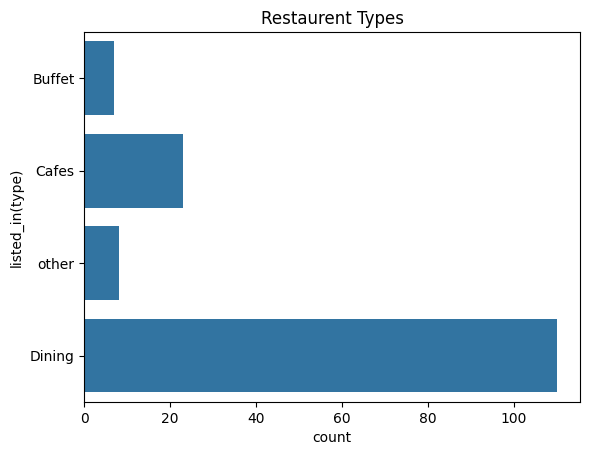

In [31]:
sns.countplot(y="listed_in(type)",data=df)
plt.title("Restaurent Types")
plt.show()

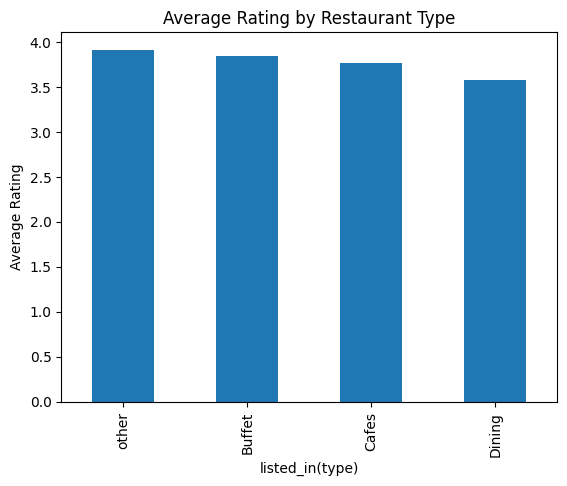

In [32]:
avg_rating = df.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

avg_rating.plot(kind='bar')
plt.title('Average Rating by Restaurant Type')
plt.ylabel('Average Rating')
plt.show()

In [33]:
plt.savefig("graph_name.png",dpi=300,bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

In [34]:
plt.savefig("online_order.png",dpi=300,bbox_inches="tight")

<Figure size 640x480 with 0 Axes>